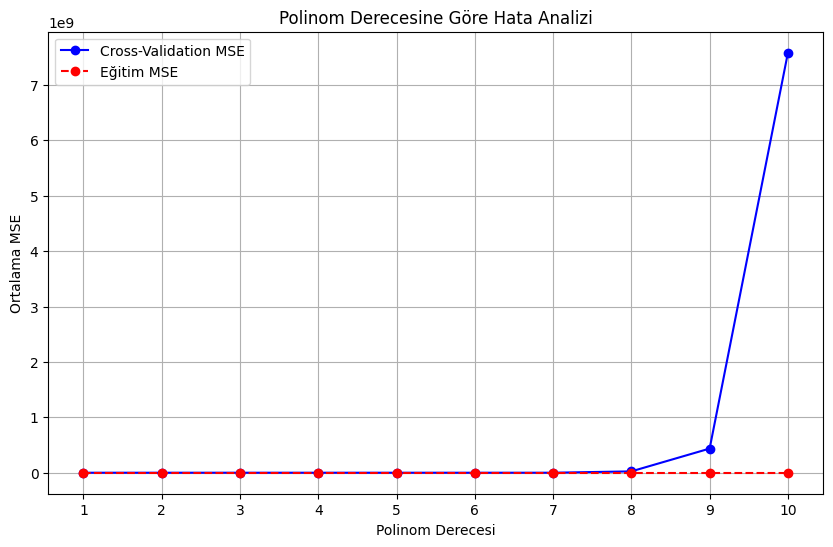

En İyi Polinom Derecesi: 2
Test Seti MSE: 0.37


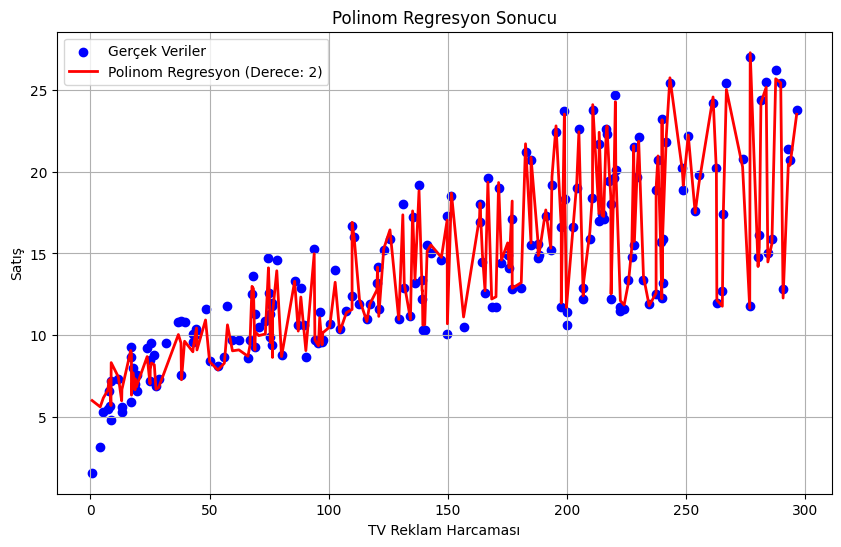

In [11]:
import pandas as pd                     # Veri işleme ve analiz için kullanılır
import matplotlib.pyplot as plt         # Grafikler çizmek için kullanılır
import seaborn as sns                   # Daha güzel görselleştirmeler için kullanılır
import numpy as np                      # Sayısal işlemler ve diziler için kullanılır
from sklearn.model_selection import train_test_split, cross_val_score  # Veri bölme ve çapraz doğrulama için
from sklearn.preprocessing import PolynomialFeatures                  # Polinom özellikler oluşturmak için
from sklearn.linear_model import LinearRegression                    # Doğrusal regresyon modeli
from sklearn.pipeline import make_pipeline                           # İşlem hattı oluşturmak için
from sklearn.metrics import mean_squared_error                       # Hata ölçümü için MSE kullanılır

# Veriyi CSV dosyasından içe aktarma
df = pd.read_csv("Advertising.csv")  # 'Advertising.csv' dosyasını okur ve bir DataFrame'e yükler

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = df.drop("sales", axis=1)  # 'sales' sütununu çıkararak geri kalan sütunları X olarak tanımlar
y = df["sales"]                # Tahmin edilecek hedef değişken (bağımlı değişken)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
# test_size=0.3: Verinin %30'u test seti, %70'i eğitim seti olarak ayrılır
# random_state=99: Sonuçların tekrarlanabilir olması için sabit rastgelelik

# Cross-Validation ile En İyi Polinom Derecesini Belirleme
degrees = range(1, 11)       # 1'den 10'a kadar polinom derecelerini denemek için bir aralık
cv_scores = []               # Cross-validation (CV) hatalarını saklamak için boş liste
train_scores = []            # Eğitim hatalarını saklamak için boş liste

for degree in degrees:
    # Polinom özellikler ve doğrusal regresyonu içeren bir pipeline oluşturma
    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),  # Polinom özellikler oluşturur
        LinearRegression()                                     # Doğrusal regresyon modeli uygular
    )

    # 5 katlı çapraz doğrulama ile negatif ortalama MSE hesaplama
    cv_mse = -np.mean(cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    # cross_val_score negatif MSE döndürdüğü için başına '-' koyarak pozitif hale getiriyoruz

    cv_scores.append(cv_mse)  # Çapraz doğrulama hatasını listeye ekler

    # Modeli eğitim verileriyle eğitme
    model.fit(X_train, y_train)

    # Eğitim seti üzerinde tahmin yapıp MSE hesaplama
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    train_scores.append(train_mse)  # Eğitim hatasını listeye ekler

# Polinom derecesine göre çapraz doğrulama ve eğitim hatalarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(degrees, cv_scores, 'bo-', label='Cross-Validation MSE')  # CV hataları (mavi noktalar ve çizgi)
plt.plot(degrees, train_scores, 'ro--', label='Eğitim MSE')        # Eğitim hataları (kırmızı noktalar ve kesik çizgi)
plt.xlabel('Polinom Derecesi')
plt.ylabel('Ortalama MSE')
plt.title('Polinom Derecesine Göre Hata Analizi')
plt.legend()
plt.grid(True)
plt.xticks(degrees)  # X ekseninde sadece 1-10 arası dereceleri göster
plt.show()

# En düşük çapraz doğrulama MSE değerine sahip polinom derecesini belirleme
best_degree = degrees[np.argmin(cv_scores)]  # cv_scores içindeki en küçük hatanın indeksini alır
print(f"En İyi Polinom Derecesi: {best_degree}")

# En iyi dereceyle final modelini oluşturma ve test seti üzerinde değerlendirme
final_model = make_pipeline(
    PolynomialFeatures(degree=best_degree, include_bias=False),
    LinearRegression()
)

# Final modeli eğitim setiyle eğitme
final_model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
y_test_pred = final_model.predict(X_test)

# Test seti için MSE hesaplama
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Seti MSE: {test_mse:.2f}")

# Polinom regresyon sonucunu görselleştirme
# TV verisini sıralıyoruz
sorted_idx = X["TV"].argsort()  # TV sütununu küçükten büyüğe sıralamak için indeks alır

plt.figure(figsize=(10, 6))
plt.scatter(X["TV"], y, color='blue', label='Gerçek Veriler')  # Gerçek verileri noktalarla gösterir

# Polinom tahminlerini sıralı şekilde çiziyoruz
y_pred_full = final_model.predict(X)  # Tüm veri üzerinde tahmin yap
plt.plot(X["TV"].iloc[sorted_idx], y_pred_full[sorted_idx], color='red', linewidth=2,
         label='Polinom Regresyon (Derece: {})'.format(best_degree))

plt.xlabel('TV Reklam Harcaması')
plt.ylabel('Satış')
plt.title('Polinom Regresyon Sonucu')
plt.legend()
plt.grid(True)
plt.show()
